## Graph analysis 

Degree distribution analysis;

- Connected components analysis;

- Path analysis;

- Clustering Coefficient, Density analysis;

- Centrality analysis.

Moreover, the statistics computed on the crawled data must be compared with the ones of (i) ER, (ii) BA, and (iii) WS graphs having (almost) the same number of nodes and edges.


In [1]:
import pandas as pd
import csv
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

In [46]:
g = nx.read_edgelist("Links.csv", delimiter=",", nodetype=int)

In [3]:
nx.info(g)

'Graph with 31394 nodes and 332118 edges'

In [4]:
nx.is_directed(g)

False

In [5]:
sum(dict(g.degree()).values())/float(len(g))

21.15805567942919

In [52]:
nx.average_clustering(g) #average clustering coefficient for the graph

0.24445377990970338

In [7]:
nx.diameter(g)

6

In [8]:
nx.density(g)

0.0006739736781903351

In [9]:
comp = nx.number_connected_components(g)
comp

1

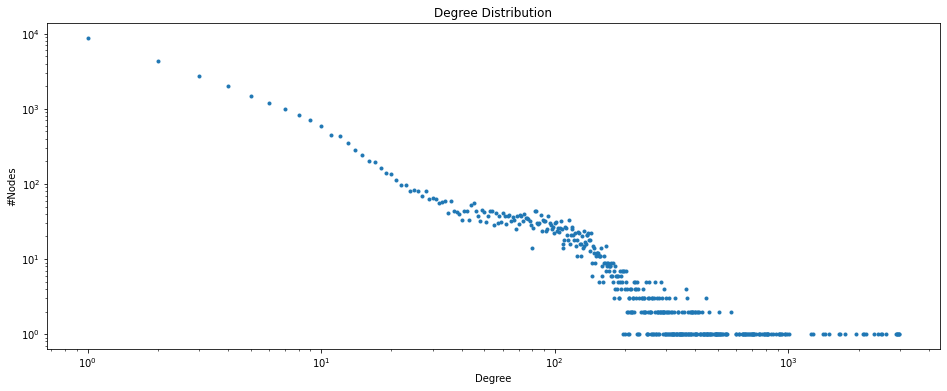

In [64]:
hist = nx.degree_histogram(g)
plt.figure(figsize=(16, 6))
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [11]:
def plot_dist(g):
    M = nx.to_scipy_sparse_matrix(g)
    xmin = min([d[1] for d in g.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

Calculating best minimal value for power law fit


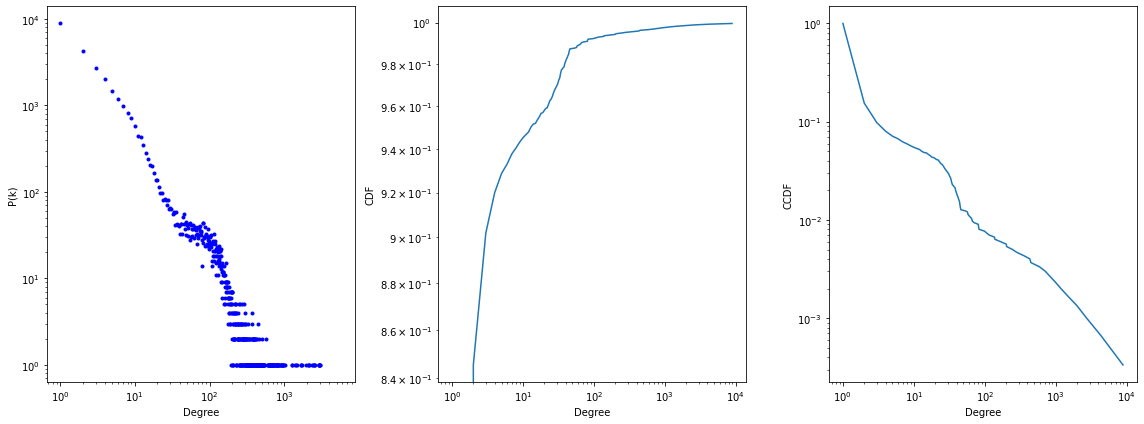

In [12]:
plot_dist(g)

In [62]:
#list of the degree of the 37 most followed users
l = 0
for i in range(1,38):
    print('Node {} => Degree: {}, Clustering_coeff: {}'.format(i, g.degree(i), round(nx.clustering(g, nodes=i), 4)))
    l = l+g.degree(i)

Node 1 => Degree: 1410, Clustering_coeff: 0.0118
Node 2 => Degree: 2912, Clustering_coeff: 0.0027
Node 3 => Degree: 2944, Clustering_coeff: 0.0028
Node 4 => Degree: 2987, Clustering_coeff: 0.0021
Node 5 => Degree: 930, Clustering_coeff: 0.001
Node 6 => Degree: 437, Clustering_coeff: 0.0195
Node 7 => Degree: 2495, Clustering_coeff: 0.0047
Node 8 => Degree: 1491, Clustering_coeff: 0.0008
Node 9 => Degree: 856, Clustering_coeff: 0.0028
Node 10 => Degree: 2416, Clustering_coeff: 0.0035
Node 11 => Degree: 2969, Clustering_coeff: 0.0012
Node 12 => Degree: 352, Clustering_coeff: 0.0017
Node 13 => Degree: 2328, Clustering_coeff: 0.0004
Node 14 => Degree: 105, Clustering_coeff: 0.0037
Node 15 => Degree: 2920, Clustering_coeff: 0.0042
Node 16 => Degree: 727, Clustering_coeff: 0.0173
Node 17 => Degree: 2079, Clustering_coeff: 0.0166
Node 18 => Degree: 2158, Clustering_coeff: 0.0029
Node 19 => Degree: 2879, Clustering_coeff: 0.0013
Node 20 => Degree: 2112, Clustering_coeff: 0.0051
Node 21 => Degre

In [37]:
l/37

1453.054054054054

ego = nx.ego_graph(g, 1) #ego network of the node
nx.draw(ego, with_labels=True)

## Comparison with other models

### ER model

To compare the ER graph with our graph we use the same parameters of the original graph which are a density equals to 0.000673 and the number of nodes 31522.

In [53]:
p = nx.density(g)
n = nx.number_of_nodes(g)
er = nx.erdos_renyi_graph(n, p) #graph wiht the same configuration

In [54]:
print('Original graph: {}\nER graph: {}, Density: {}'.format(nx.info(g), nx.info(er), p))

Original graph: Graph with 31394 nodes and 332118 edges
ER graph: Graph with 31394 nodes and 332759 edges, Density: 0.0006739736781903351


In [55]:
avg_d = 2*nx.number_of_edges(er)/nx.number_of_nodes(er)
avg_d

21.198891507931453

In [16]:
nx.average_clustering(er) #the same as p, density set in the model parameters

0.0006768772651689309

The regime of the network is connected

In [17]:
pc = 1/nx.number_of_nodes(er)
pc

3.185322036057845e-05

In [18]:
p>pc

True

In [19]:
pc2 = np.log(nx.number_of_nodes(er))/nx.number_of_nodes(er)
pc2

0.0003298200952677312

In [56]:
avg_d>np.log(nx.number_of_nodes(er))

True

In [20]:
p>pc2

True

### BA model

In [57]:
m = int(nx.number_of_edges(g)/nx.number_of_nodes(g))
ba = nx.barabasi_albert_graph(n, m)

In [58]:
print('Original graph: {}\nBA graph: {}, Number of edges for the preferential attachement (m): {}'.format(nx.info(g), nx.info(ba), m))

Original graph: Graph with 31394 nodes and 332118 edges
BA graph: Graph with 31394 nodes and 313840 edges, Number of edges for the preferential attachement (m): 10


In [59]:
nx.density(ba)

0.0006368817684174142

In [23]:
k_max = max(dict(ba.degree()).values())#degree of the largest hub
k_max

1147

In [24]:
ratio = k_max/nx.number_of_nodes(ba)
ratio

0.03653564375358349

In [25]:
sum(dict(ba.degree()).values())/float(len(ba)) #avg degree

19.993629355927883

In [26]:
nx.average_clustering(ba)

0.004632109775724173

### Degree distribution comparison

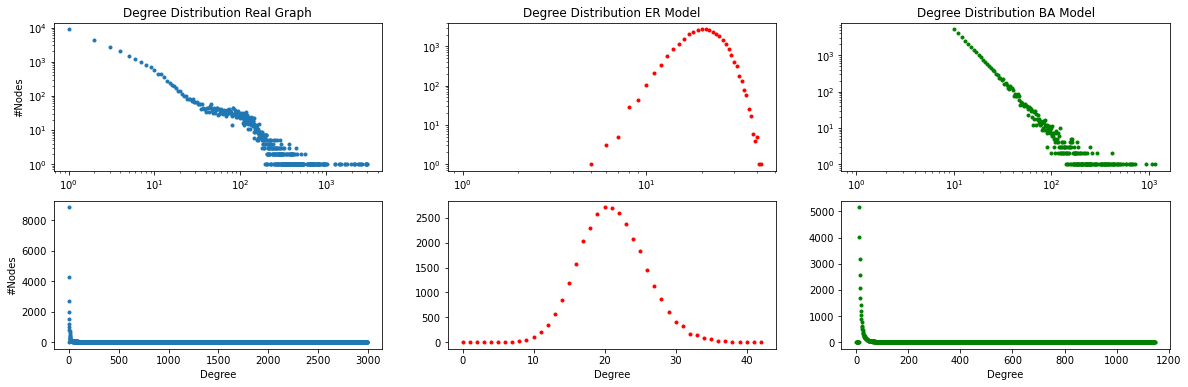

In [27]:
hist_er = nx.degree_histogram(er)
hist = nx.degree_histogram(g)
hist_b = nx.degree_histogram(ba)

fig = plt.figure(figsize=(20, 6)) 
plt.subplot(2, 3, 1)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution Real Graph")
plt.ylabel("#Nodes")
plt.loglog()

plt.subplot(2, 3, 2)
plt.plot(range(0, len(hist_er)), hist_er, ".", color = 'red')
plt.title("Degree Distribution ER Model")
plt.loglog()

plt.subplot(2, 3, 3)
plt.plot(range(0, len(hist_b)), hist_b, ".",color = 'green')  
plt.title("Degree Distribution BA Model")
plt.loglog()

plt.subplot(2, 3, 4)
plt.plot(range(0, len(hist)), hist, ".")
plt.xlabel("Degree")
plt.ylabel("#Nodes")

plt.subplot(2, 3, 5)
plt.plot(range(0, len(hist_er)), hist_er, ".",color = 'red')
plt.xlabel("Degree")

plt.subplot(2, 3, 6)
plt.plot(range(0, len(hist_b)), hist_b, ".",color = 'green')
plt.xlabel("Degree")

plt.show()

### Watts strogatz model

In [28]:
ws = nx.watts_strogatz_graph(g.number_of_nodes(), k=40, p=0)

In [29]:
print(f"Global clustering: {nx.average_clustering(ws)}")

Global clustering: 0.7307692307694483


In [30]:
# network generators 2 (small-world) ER
ws2 = nx.watts_strogatz_graph(g.number_of_nodes(), k=40, p=1)

In [31]:
print(f"Global clustering: {nx.average_clustering(ws2)}")

Global clustering: 0.0012385197015696426


In [32]:
# network generators 2 (small-world)
ws3 = nx.watts_strogatz_graph(g.number_of_nodes(), k=40, p=0.05)

In [33]:
print(f"Global clustering: {nx.average_clustering(ws3)}")

Global clustering: 0.6270626701111505
